# Reinforcement Learning by QLearning - The case of the Connect Four Game

In this notebook, we give an introduction to Q-Learning that is a framework to perform reinforcement learning. We provide an application to the connect four game.
![Drag Racing](https://upload.wikimedia.org/wikipedia/en/7/79/Connect_4_Board_and_Box.jpg)

This notebook is a follow-up of another notebook on Q-learning with an application to the sticks game.
http://romain.raveaux.free.fr/document/ReinforcementLearningbyQLearningThestickgame.html

## The goals : 
1. An introduction to Q-Learning 
1. An application to the connect four game
1. Code in Python base Numpy and Matplotlib

## Author : Romain Raveaux


# Why a follow-up notebook

This notebook :http://romain.raveaux.free.fr/document/ReinforcementLearningbyQLearningThestickgame.html. 
This notebook is a follow-up of another notebook on Q-learning with an application to the sticks game.


## In this notebook, we want to explore a more complex game than the Stick Game. We want to try the Connect Four game


# Reinforcement Learning 

We give some definitions that are mostly taken from (https://en.wikipedia.org/wiki/Reinforcement_learning).

Reinforcement learning (RL) 
1. is an area of machine learning concerned with how software agents ought to take actions in an environment so as to maximize some notion of cumulative reward. 
2. is one of three basic machine learning paradigms, alongside supervised learning and unsupervised learning.

Supervised Learning (SL) : 
1. It aims to learn a function $f$ that maps $\mathcal{X} \to \mathcal{Y}$ where $\mathcal{X}$ is the input domain and $\mathcal{Y}$ is the output domain. $f$ can be a composition of functions $f=f_1 \circ f_2 \circ \cdots f_k$. The learning stage must exploit pairs $(x \in \mathcal{X}  ,y \in \mathcal{Y})$.

Reinforcement learning (RL) 
1. It is similar from SL in such a way that the goal is to learn a function $f$ that maps $\mathcal{X} \to \mathcal{Y}$. $f$ can also be a composition of functions $f=f_1 \circ f_2 \circ \cdots f_k$. In RL, sub-functions are also called actions.
2. It differs from $\textbf{supervised learning}$ in that the learning stage exploits pairs $(x \in \mathcal{X}  ,\overline{y} \in \overline{\mathcal{Y}})$. Where $\overline{\mathcal{Y}}$ is domain of incomplete outputs such that $\overline{y} \subset y$.

![texte alt](https://upload.wikimedia.org/wikipedia/commons/thumb/1/1b/Reinforcement_learning_diagram.svg/500px-Reinforcement_learning_diagram.svg.png "toto")

The typical framing of a Reinforcement Learning (RL) scenario: an agent takes actions in an environment, which is interpreted into a reward and a representation of the state, which are fed back into the agent.
The environment is typically formulated as a Markov decision process (MDP)


# Markov decision process

A Markov decision process is a 4-tuple ${\displaystyle (S,A,P,R)}$, where

1. a set of environment and agent states, $S$;
1. a set of actions, $A$, of the agent;
1. $P={\displaystyle \Pr(s_{t+1}=s'\mid s_{t}=s,a_{t}=a)}$ is the probability of transition from state ${\displaystyle s}$ to state ${\displaystyle s'}$ under action ${\displaystyle a}$. $P:  A \times S \to  \mathbb{R}^S $
1. ${\displaystyle R(s,s',a)}$ is the immediate reward after transition from ${\displaystyle s}$ to ${\displaystyle s'}$ with action ${\displaystyle a}$. $R: S \times S \times A \to \mathbb{R}$

![texte alt](https://www.kdnuggets.com/images/reinforcement-learning-fig1-700.jpg "toto")


## Optimization problem with Markov decision process : Finding the best policy $\pi$
The core problem of Markov decision processes is to find a "policy" for the decision maker: a function $\pi$  that specifies the action $a=\pi(s)$ that the decision maker will choose when in state $s$.
In the Markov decision process, we want to maximize the sum of the rewards over all time steps.

$$\pi^*=arg \max_{\pi} \sum_{t=1}^T R(s_t,s^*,\pi(a^*))  $$
$$s^*,a^*=arg \max_{s',a} \Pr(s'\mid s_{t},a)$$

The goal is to choose a policy $\pi$  that will maximize some cumulative function of the random rewards, typically the expected discounted sum over a potentially infinite horizon:

${\displaystyle E[\sum _{t=0}^{\infty }{\gamma ^{t}R(a_t,s_{t},s_{t+1})}]}$   (where we choose ${\displaystyle a_{t}=\pi (s_{t})}$, i.e. actions given by the policy). And the expectation is taken over ${\displaystyle s_{t+1}\sim P}({a_{t},s_{t},s_{t+1})}$
where  $\gamma$   is the discount factor satisfying ${\displaystyle 0\leq \ \gamma \ \leq \ 1}$, which is usually close to 1.

## Decision phase
Once a Markov decision process is combined with a policy in this way, this fixes the action for each state and the resulting combination behaves like a Markov chain (since the action chosen in state {\displaystyle s}s is completely determined by $\pi(s)$ and  $\Pr(s_{t+1}=s'\mid s_{t}=s,a_{t}=a)$ reduces to $\Pr(s_{t+1}=s'\mid s_{t}=s)$, a Markov transition matrix).


# Exploration and Exploitation 
One of the challenges that arise in reinforcement learning, and not in other kinds
of learning, is the trade-of between exploration and exploitation. To obtain a lot of
reward, a reinforcement learning agent must prefer actions that it has tried in the past
and found to be e↵ective in producing reward. But to discover such actions, it has to
try actions that it has not selected before. The agent has to exploit what it has already
experienced in order to obtain reward, but it also has to explore in order to make better
action selections in the future.

# Q-learning 

The goal of Q-learning is to learn a policy $\pi(s)$, which tells an agent what action to take under what state.

Q-learning finds a policy that is optimal in the sense that it maximizes the expected value of the total reward over any and all successive steps, starting from the current state.

"Q" names the function that returns the reward used to provide the reinforcement and can be said to stand for the "quality" of an action taken in a given state.

$$Q: S \times A \to \mathbb{R} $$



Before learning begins, $Q$ is initialized to a possibly arbitrary fixed value (chosen by the programmer). Then, at each time $t$ the agent selects an action $a_{t}$, observes a reward $r_{t}$, enters a new state $s_{t+1}$ (that may depend on both the previous state $s_{t}$ and the selected action), and $Q$ is updated. The core of the algorithm is a simple value iteration update, using the weighted average of the old value and the new information:

${\displaystyle Q^{new}(s_{t},a_{t})\leftarrow (1-\alpha )\cdot \underbrace {Q(s_{t},a_{t})} _{\text{old value}}+\underbrace {\alpha } _{\text{learning rate}}\cdot \overbrace {{\bigg (}\underbrace {r_{t}} _{\text{reward}}+\underbrace {\gamma } _{\text{discount factor}}\cdot \underbrace {\max _{a}Q(s_{t+1},a)} _{\text{estimate of optimal future value}}{\bigg )}} ^{\text{learned value}}}$
where ${\displaystyle r_{t}}$ is the reward received when moving from the state $s_{{t}}$ to the state $s_{t+1}$, and $\alpha$  is the learning rate $0<\alpha \leq 1$).

## Discount factor  $\gamma$
The discount factor $\gamma$  determines the importance of future rewards. A factor of 0 will make the agent "myopic" (or short-sighted) by only considering current rewards, i.e. $r_{t}$ (in the update rule above), while a factor approaching 1 will make it strive for a long-term high reward. 

# Exploring the action state space
In the learning phase, the state space of action $a_t$ must be explored. This is achieved by the concerp of exploration and exloitation.

## Exploration and Exploitation 
One of the challenges that arise in reinforcement learning, and not in other kinds
of learning, is the trade-of between exploration and exploitation. To obtain a lot of
reward, a reinforcement learning agent must prefer actions that it has tried in the past
and found to be e↵ective in producing reward. But to discover such actions, it has to
try actions that it has not selected before. The agent has to exploit what it has already
experienced in order to obtain reward, but it also has to explore in order to make better
action selections in the future.

## Epsilon-greedy policy $\pi(s,\epsilon,rnd)$
$\epsilon$ is the probabiliy of exploration. Let $rnd$ be a random number between 0 and 1.
$$\begin{eqnarray}
\epsilon < rnd  \quad& a^*=\pi(s)=random_a \, Q(s,a) &\quad Exploration \\
\epsilon \geq rnd \quad& a^*=\pi(s)= \max_a Q(s,a) & \quad Exploitation \\
\end{eqnarray}$$




# Q-Learning Algorithm

![texte alt](http://romain.raveaux.free.fr/document/Qlearningalgoithme.PNG "toto")

# The case of a 2-players game


# Q-Learning Algorithm for 2 players.
The key idea is to train two players at the time. 
Another key point is that the reward depends on the failure or the sucess of the other player. If player one made a move that led to the KO of the player two then player one move should be rewarded.

![texte alt](http://romain.raveaux.free.fr/document/Qlearningalgoithme2playersv2.PNG "toto")
In the above algorithm, it is possible to make player 2 a random player by fixing $\epsilon$ to 1. Note that if player 2 is stupid then player 1 might not be very clever to win :-) 

# The connect four game
From : https://en.wikipedia.org/wiki/Connect_Four

Connect Four (also known as Four Up, Plot Four, Find Four, Four in a Row, Four in a Line, Drop Four, and Gravitrips (in Soviet Union)) is a two-player connection board game in which the players first choose a color and then take turns dropping one colored disc from the top into a seven-column, six-row vertically suspended grid. The pieces fall straight down, occupying the lowest available space within the column. The objective of the game is to be the first to form a horizontal, vertical, or diagonal line of four of one's own discs. Connect Four is a solved game. The first player can always win by playing the right moves.

![yes](https://upload.wikimedia.org/wikipedia/commons/a/ad/Connect_Four.gif)

# Modeling the game
The board is modeled as a matrix M. 
M has 6 rows and 7 columns and so 42 cells.
M[1,1]=1 to represent a red token.
M[1,1]=2 to represent a yellow token.
M[1,1]=0 to represent an empty place.


An action can take the following values : $A=\{1,2,3,...,7\}$. The index of the column to be played. As indices of arrays and matrices start at 0. We propose to change $A=\{0,2,3,...,6\}$.

The agent can take the following values : $S=\{1,\cdots,  42\}$. One value corresponds to one location (x,y) of the matrix M.
As indices of arrays and matrices start at 0. We propose to change  : $S=\{0,\cdots,  41\}$.
State 0 corresponds to the location M[0,0], ...,  State 1 corresponds to the location M[0,1] ....

The Q-table will be a matrix of size 42 X 7.

# Discussion about this model : 
The agent is only defined by its location in the board (x,y coordonates of the last token). This definition is quite blind. It means that the agent state does not reflect the entire state of the game. In this modelling, the agent state is very a narrow and a very local view of the game (the last move). This is a limitation of this approach.
To overcome this problem, one can think about the following modelling : 
* 1. Each cell can take 3 values
* 2. There is 42 cells in the board
* 3. A vector of size $3^{42}$ can model the sate of the agent completly. $3^{42}= 1.0941899e+20$
* 4. The Q-table will have the size of $3^{42}$ X 7. I m not sure it can even fit into memory.

The problem is then that the state space is very large and it is hard to explore it efficiently. The number of experiments (number of game simulations) will be very high.


# Start to code
## Let us define some import to manage matrices and plots

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

# Let us define the board



M.shape= (6, 7)
M
 [[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]


Text(0.5, 1.05, 'The board')

<Figure size 432x288 with 0 Axes>

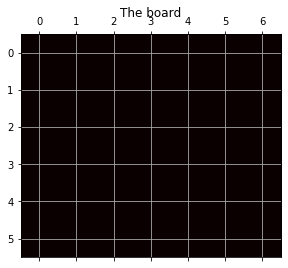

In [2]:
nbrows=6
nbcolumns=7
M=np.zeros((nbrows,nbcolumns))

#Print the board
print("M.shape=",M.shape)
print("M\n",M)

#Plot the sticks
fig=plt.figure(1)
plt.matshow(M,cmap='hot')
plt.grid(b=True,which='both')
plt.title("The board")


# We define the set of actions A, the set of agent states S and the Q table.


In [3]:
A = np.array([0,1,2,3,4,5,6])
S =[]
for i in range(0,nbrows*nbcolumns):
    S.append(i)
S=np.array(S)
print("S.shape=",S.shape)
print("A.shape=",A.shape)
Q1=np.zeros((S.shape[0],A.shape[0]))
Q2=np.zeros((S.shape[0],A.shape[0]))
print("Q1.shape=",Q1.shape)
print("Q2.shape=",Q2.shape)



S.shape= (42,)
A.shape= (7,)
Q1.shape= (42, 7)
Q2.shape= (42, 7)


# The board states. 
Each cell of the matrix  with coordinates (x,y) is a possible state of the agent. So we decided to create a 1D list with a all the states. It will be more convenient later on. Another implementation could be possibe. 


In [4]:
def CreateBoardStates(nbrows,nbcolumns):
    
    #boardstate is a list where all (x,y) are stored. The order is row major. It means that each line is concatainated.
    boardstate=[]
    count=0
    for y in range(nbrows):
        for x in range(nbcolumns):
            boardstate.append((x,y))
    return boardstate




In [5]:
boardstate=CreateBoardStates(nbrows,nbcolumns)
print("len(boardstate)=",len(boardstate))
print("boardstate\n",boardstate[0:5])


len(boardstate)= 42
boardstate
 [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0)]


# Let us define a function that can give the coordonnates (x,y) in function of the state

In [6]:
def getXYfromAgentState(agentstate,boardstate):
    xy=boardstate[agentstate]
    return xy


In [7]:
print("agentstate=0 so xy=",getXYfromAgentState(0,boardstate))
print("agentstate=1 so xy=",getXYfromAgentState(1,boardstate))
print("agentstate=2 so xy=",getXYfromAgentState(2,boardstate))
print("agentstate=3 so xy=",getXYfromAgentState(3,boardstate))
print("agentstate=4 so xy=",getXYfromAgentState(4,boardstate))
print("agentstate=5 so xy=",getXYfromAgentState(5,boardstate))
print("agentstate=6 so xy=",getXYfromAgentState(6,boardstate))
print("agentstate=7 so xy=",getXYfromAgentState(7,boardstate))
print("agentstate=8 so xy=",getXYfromAgentState(8,boardstate))
print("agentstate=35 so xy=",getXYfromAgentState(35,boardstate))
print("agentstate=41 so xy=",getXYfromAgentState(41,boardstate))

agentstate=0 so xy= (0, 0)
agentstate=1 so xy= (1, 0)
agentstate=2 so xy= (2, 0)
agentstate=3 so xy= (3, 0)
agentstate=4 so xy= (4, 0)
agentstate=5 so xy= (5, 0)
agentstate=6 so xy= (6, 0)
agentstate=7 so xy= (0, 1)
agentstate=8 so xy= (1, 1)
agentstate=35 so xy= (0, 5)
agentstate=41 so xy= (6, 5)


# Get Board State from x,y

In [8]:
def getAgentStateFromXY(x,y,boardstate):
    return boardstate.index((x,y))



In [9]:
print("agentstate=",getAgentStateFromXY(0,0,boardstate) ,"so xy=",(0,0))
print("agentstate=",getAgentStateFromXY(1,0,boardstate) ,"so xy=",(1,0))
print("agentstate=",getAgentStateFromXY(2,0,boardstate) ,"so xy=",(2,0))
print("agentstate=",getAgentStateFromXY(3,0,boardstate) ,"so xy=",(3,0))
print("agentstate=",getAgentStateFromXY(4,0,boardstate) ,"so xy=",(4,0))
print("agentstate=",getAgentStateFromXY(5,0,boardstate) ,"so xy=",(5,0))
print("agentstate=",getAgentStateFromXY(6,0,boardstate) ,"so xy=",(6,0))
print("agentstate=",getAgentStateFromXY(0,1,boardstate) ,"so xy=",(0,1))
print("agentstate=",getAgentStateFromXY(1,1,boardstate) ,"so xy=",(1,1))
print("agentstate=",getAgentStateFromXY(6,5,boardstate) ,"so xy=",(6,5))


agentstate= 0 so xy= (0, 0)
agentstate= 1 so xy= (1, 0)
agentstate= 2 so xy= (2, 0)
agentstate= 3 so xy= (3, 0)
agentstate= 4 so xy= (4, 0)
agentstate= 5 so xy= (5, 0)
agentstate= 6 so xy= (6, 0)
agentstate= 7 so xy= (0, 1)
agentstate= 8 so xy= (1, 1)
agentstate= 41 so xy= (6, 5)


# Let's compute a new state from an action and the board

In [10]:
#we simulate the gravity : the token is fallen to the board.
def ComputeNewState(action,M,boardstate):
    y=0
    x=action
    
    if M[y,x]!=0:
        return -1,x,y
    
    while y<M.shape[0] and M[y,x]==0:
        y=y+1

    
    if y>0:
        y=y-1
    
    newagentstate=getAgentStateFromXY(x,y,boardstate)
    return newagentstate,x,y


(6, 7)
Let us place the tocken in the first column:
newagentstate,x,y 35 0 5
Let us place the tocken in the first column:
newagentstate,x,y 28 0 4
Let us place the tocken in the first column:
newagentstate,x,y 21 0 3
Let us place the tocken in the first column:
newagentstate,x,y 14 0 2
Let us place the tocken in the first column:
newagentstate,x,y 7 0 1
Let us place the tocken in the first column:
newagentstate,x,y 0 0 0


Text(0.5, 1.05, 'The board')

<Figure size 432x288 with 0 Axes>

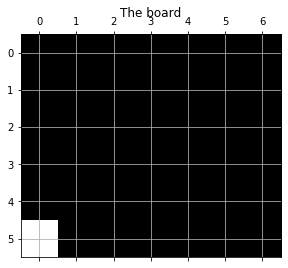

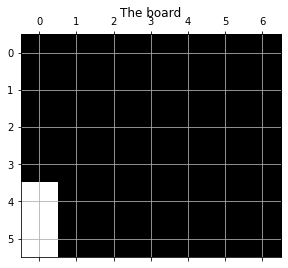

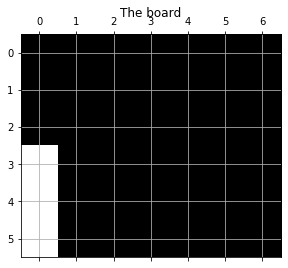

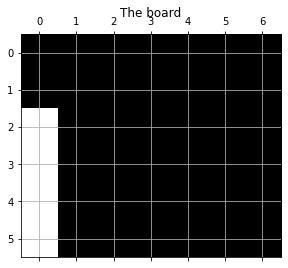

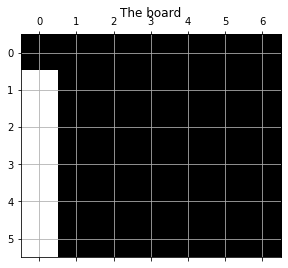

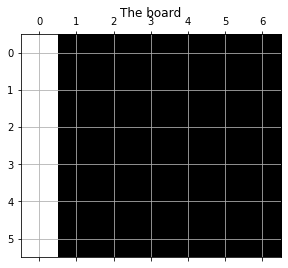

In [11]:
M=np.zeros((nbrows,nbcolumns))
print(M.shape)

print("Let us place the tocken in the first column:")
newagentstate,x,y=ComputeNewState(0,M,boardstate)
print("newagentstate,x,y",newagentstate,x,y)
M[y,x]=1



#Plot the sticks
fig=plt.figure(1)
plt.matshow(M,cmap='gray')
plt.grid(b=True,which='both')
plt.title("The board")

print("Let us place the tocken in the first column:")
newagentstate,x,y=ComputeNewState(0,M,boardstate)
print("newagentstate,x,y",newagentstate,x,y)
M[y,x]=1

#Plot the sticks
fig=plt.figure(2)
plt.matshow(M,cmap='gray')
plt.grid(b=True,which='both')
plt.title("The board")



print("Let us place the tocken in the first column:")
newagentstate,x,y=ComputeNewState(0,M,boardstate)
print("newagentstate,x,y",newagentstate,x,y)
M[y,x]=1

#Plot the sticks
fig=plt.figure(2)
plt.matshow(M,cmap='gray')
plt.grid(b=True,which='both')
plt.title("The board")



print("Let us place the tocken in the first column:")
newagentstate,x,y=ComputeNewState(0,M,boardstate)
print("newagentstate,x,y",newagentstate,x,y)
M[y,x]=1

#Plot the sticks
fig=plt.figure(2)
plt.matshow(M,cmap='gray')
plt.grid(b=True,which='both')
plt.title("The board")


print("Let us place the tocken in the first column:")
newagentstate,x,y=ComputeNewState(0,M,boardstate)
print("newagentstate,x,y",newagentstate,x,y)
M[y,x]=1

#Plot the sticks
fig=plt.figure(2)
plt.matshow(M,cmap='gray')
plt.grid(b=True,which='both')
plt.title("The board")


print("Let us place the tocken in the first column:")
newagentstate,x,y=ComputeNewState(0,M,boardstate)
print("newagentstate,x,y",newagentstate,x,y)
M[y,x]=1

#Plot the sticks
fig=plt.figure(2)
plt.matshow(M,cmap='gray')
plt.grid(b=True,which='both')
plt.title("The board")




# Check if a board represents a winning game

In [12]:
def Checkforoneplayer(M,idplayer):
    COLUMN_COUNT=M.shape[1]
    ROW_COUNT=M.shape[0]
    
    # Check horizontal locations for win
    for c in range(COLUMN_COUNT-3):
        for r in range(ROW_COUNT):
            if M[r][c] == idplayer and M[r][c+1] == idplayer and M[r][c+2] == idplayer and M[r][c+3] == idplayer:
                return True

    # Check vertical locations for win
    for c in range(COLUMN_COUNT):
        for r in range(ROW_COUNT-3):
            if M[r][c] == idplayer and M[r+1][c] == idplayer and M[r+2][c] == idplayer and M[r+3][c] == idplayer:
                return True

    # Check positively sloped diaganols
    for c in range(COLUMN_COUNT-3):
        for r in range(ROW_COUNT-3):
            if M[r][c] == idplayer and M[r+1][c+1] == idplayer and M[r+2][c+2] == idplayer and M[r+3][c+3] == idplayer:
                return True

    # Check negatively sloped diaganols
    for c in range(COLUMN_COUNT-3):
        for r in range(3, ROW_COUNT):
            if M[r][c] == idplayer and M[r-1][c+1] == idplayer and M[r-2][c+2] == idplayer and M[r-3][c+3] == idplayer:
                return True

       
    return False
    
def CheckIfWinningGame(M,idplayer):
    
    winner=False
    #Checking for player one
    winnerid=Checkforoneplayer(M,idplayer)
    
    return winnerid



In [13]:
M=np.zeros((nbrows,nbcolumns))

M[0,1]=1
M[1,0]=0
M[2,0]=0
M[2,3]=1
M[1,2]=1
M[3,0]=0
M[3,4]=1
print(M)
print("And player one wins=",CheckIfWinningGame(M,1))
print("And player two wins=",CheckIfWinningGame(M,2))

[[0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
And player one wins= True
And player two wins= False


# Step in the board
## The function allows to take an action in the game

In [14]:
def step(action,agentstate,M,playerid,boardstate):
    # Let's take action
    done=False
    reward=0
    newagentstate,xnew,ynew=ComputeNewState(action,M,boardstate)
    
    #We check if we could move or not to a new state
    #is there any room for a token
    if newagentstate==-1:
        done=True
        reward=-1
        return agentstate,reward,done
    
    #we place the token to the new empty slot
    M[ynew,xnew]=playerid
    
    win=False
    win=CheckIfWinningGame(M,playerid)
    
    if win==True:
        reward=1
        done=True
    

           
    return newagentstate,reward,done


In [15]:
M=np.zeros((nbrows,nbcolumns))
print(step(0,0,M,1,boardstate) )
print(M)
print(step(0,35,M,1,boardstate) )
print(M)

(35, 0, False)
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]]
(28, 0, False)
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]]


# Random walk
## Let's move randomly in the board
## This is equivalent to $\epsilon=1$ in the epsilon greedy policy

0 35 35 False
2 37 37 False
5 40 40 False
0 28 28 False
3 38 38 False
5 33 33 False
0 21 21 False
4 39 39 False
4 32 32 False
2 30 30 False
1 36 36 False
4 25 25 False
5 26 26 False
5 19 19 False
2 23 23 False
4 18 18 False
0 14 14 False
0 7 7 False
0 0 0 False
4 11 11 False
2 16 16 False
6 41 41 False
3 31 31 False
3 24 24 False
3 17 17 False
6 34 34 False
2 9 9 False
3 10 10 False
2 2 2 True


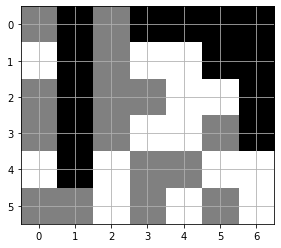

In [16]:
M=np.zeros((nbrows,nbcolumns))

fig = plt.figure() # just for display

state=0 #initial state of the agent
done=False
listimages=[] # just for display : store images
stepcounter=0
idplayer=1
while done != True: # Move until we reach the end of the game
    action = np.random.choice(A) # Choose a random action
    newtstate,reward,end=step(action,state,M,idplayer,boardstate) # Move according to the move
    state=newtstate # update state
    done=end # update are we done or not ? 
    stepcounter=stepcounter+1
    print(action,state,newtstate,end) # print
    im = plt.imshow(M, animated=True,cmap='gray') # display board
    plt.grid(b=True,which='both')
    listimages.append([im]) # display maze and agent
    idplayer=idplayer+1
    if idplayer==3:
        idplayer=1
    
    


#  Let's animate

In [17]:
from matplotlib import animation, rc
from IPython.display import HTML

ani = animation.ArtistAnimation(fig, listimages, interval=2000, blit=True,
                                repeat_delay=100)


ani.save('RandomConnect4.mp4')

plt.show()
HTML(ani.to_html5_video())


# Time to learn how to play

# Code : Q-Learning 

 


# $\epsilon$-greedy policy

In [18]:
# Choose an action from the espilon greedy policy
def ChooseActionFromPolicy(A,epsilon,Q,state):
    rnd=np.random.random()
    if rnd<epsilon:
        action = np.random.choice(A)
    else:
        action = Q[state,:].argmax()

    return action


# Update the Q Table

In [19]:
# Update the Q table (see equation above)
def UpdateQ(Q,state,action,newstate,reward,alpha,gamma):    
    firstterm=(1-alpha)*Q[state,action]
    secondterm=gamma*Q[newstate,:].max()
    thirdterm=alpha*(reward+secondterm)
    res=firstterm+thirdterm
    Q[state,action]=res

# Play One Game and learn the Q table

In [20]:
# Debug function to do some display
def debugfunction(at,s,M,Q1,Q2,epsilon,t,player,listimages):
        #code for display
        ttl = plt.text(3, 43, 
                       "Board                               Qtable-Player 1                     Qtable-Player 2"+
                       "\nAction player "+str(player)+"="+str(at)+" and State ="+str(s)+
                       "| Number of games="+str(t)+"| epsilon="+"{:.2f}".format(epsilon)                       
                       ,horizontalalignment='right', verticalalignment='top', fontsize="small")
        #vmin=0, vmax=1,
        im1 = axarr[0].matshow(M, animated=True,vmax=2,cmap='gray')
        im2 = axarr[1].matshow(Q1, animated=True,cmap='gray')
        im3 = axarr[2].matshow(Q2, animated=True,cmap='gray')
        listimages.append([im1,im2,im3,ttl])
    
# Let's play one game
def OneGameLearning(A,Q1,Q2,M,epsilon1,espilon2,alpha,gamma,listimages,t,debug):
    if debug==True:
        debugfunction(-1,0,M,Q1,Q2,-1,t,-1,listimages)        
        
       
    s=0 #initial state
    done = False
    while done != True : # Move until a player lose
        
        # Player one plays first
        at1= ChooseActionFromPolicy(A,epsilon1,Q1,s) #choose an action
        st1,rt1,end1=step(at1,s,M,1,boardstate) # Move according to the action
        #Update Q1
        UpdateQ(Q1,s,at1,st1,rt1,alpha,gamma)

        #code for debug and display
        if debug==True:
            debugfunction(at1,st1,M,Q1,Q2,epsilon1,t,1,listimages)        
         #end code for debug and display   
        
        #player 1 has won
        if end1==True and rt1>0:
            return 1
        
        #Bad move from player 1 so player 2 has won
        if end1==True and rt1==-1:
            return 2
        
        
   
        # Player two plays
        at2= ChooseActionFromPolicy(A,epsilon2,Q2,st1) #choose an action
        st2,rt2,end2=step(at2,st1,M,2,boardstate) # Move according to the action
        #Update Q2
        UpdateQ(Q2,st1,at2,st2,rt2,alpha,gamma)
        
        if debug==True and rt2==1:
            debugfunction(at2,st2,M,Q1,Q2,epsilon2,t,2,listimages)
        
        #player 2 has won
        if end2==True and rt2>0:
            return 2
        
        #Bad move from player 2 so player 1 has won
        if end2==True and rt2==-1:
            return 1
        

        s=st2
    
    return 0



# Let us run 5 games. The goal is to show the learning of the Qtables step by step.
# Player 2 is random player (epsilon=1). He always does exploration. He never takes advantage of the knowledge inside the Qtable. Player 1 exploits more his knowledge 70 percent of time.


(6, 7)
S= [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
S.shape= (42,)
A= [0 1 2 3 4 5 6]
A.shape= (7,)
Q1.shape= (42, 7)
Q2.shape= (42, 7)
M= [[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
M.shape= (6, 7)
t= 0 epsilon1= 0.3  player  1  wins
t= 1 epsilon1= 0.3  player  1  wins
t= 2 epsilon1= 0.3  player  1  wins
t= 3 epsilon1= 0.3  player  2  wins
t= 4 epsilon1= 0.3  player  2  wins
Fin du QLearning !!!
Percentage of winning games for player one : 60.0


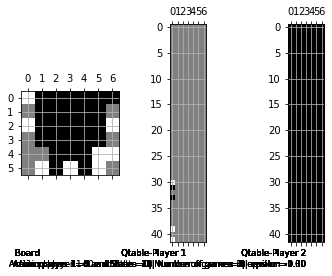

In [21]:
# the code for display
# we create figure for animation
f, axarr = plt.subplots(1,3)
listimages=[] # Just for the animation


axarr[0].grid(b=True,which='both')
axarr[1].grid(b=True,which='both')
axarr[2].grid(b=True,which='both')


#axarr[1].set_yticks(np.arange(0, nbrows*nbcolumns, 1),minor=True)
#axarr[1].set_yticklabels(np.arange(0, nbrows*nbcolumns, 1),minor=True)

#axarr[2].set_yticks(np.arange(0, nbrows*nbcolumns, 1),minor=True)
#axarr[2].set_yticklabels(np.arange(0, nbrows*nbcolumns, 1),minor=True)


####################
# Q learning runnning
####################


#Let's initialize the Q Table
Q1=np.zeros((S.shape[0],A.shape[0]))
Q2=np.zeros((S.shape[0],A.shape[0]))

#Let's initialize the matrix
boardstate=CreateBoardStates(nbrows,nbcolumns)
M=np.zeros((nbrows,nbcolumns))
print(M.shape)

print("S=",S)
print("S.shape=",S.shape)
print("A=",A)
print("A.shape=",A.shape)
print("Q1.shape=",Q1.shape)
print("Q2.shape=",Q2.shape)
print("M=",M)
print("M.shape=",M.shape)


#Let's define some hyper parameters
alpha=0.01 #learing rate
gamma=0.9 #Discount factor
epsilon1=0.3 #probability of exploration we want to get at the end
epsilon2=1 #probability of exploration we want to get at the end
nbgames=5 # The number of trials, number of games


statsnbplayeronewins=0
for t in range(nbgames):
    # run one game
    #Let's initialize the board to 0
    M=np.zeros((nbrows,nbcolumns))
    playeronewins=OneGameLearning(A,Q1,Q2,M,epsilon1,epsilon2,alpha,gamma,listimages,t,True)
    if playeronewins==1:
        statsnbplayeronewins+=1
    
    print("t=",t, "epsilon1=",epsilon1," player ",playeronewins," wins")
statsnbplayeronewins/=float(nbgames)
statsnbplayeronewins*=100
print("Fin du QLearning !!!")
print("Percentage of winning games for player one : "+str(statsnbplayeronewins))
#f.colorbar(listimages[4][0], ax=axarr[2])

In [22]:
from matplotlib import animation, rc
from IPython.display import HTML

ani = animation.ArtistAnimation(f, listimages, interval=8000, blit=True,
                                repeat_delay=100)


ani.save('QlearningConnect4.mp4')

plt.show()


In [23]:
HTML(ani.to_html5_video())


# Let us run 10 000 games. The goal is to see what is learnt. We want to see how the Qtables look like after 10 000 games. Player 2 is a random player

(6, 7)
S= [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
S.shape= (42,)
A= [0 1 2 3 4 5 6]
A.shape= (7,)
Q1.shape= (42, 7)
Q2.shape= (42, 7)
M= [[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
M.shape= (6, 7)
Fin du QLearning !!!
Percentage of winning games for player one : 62.739999999999995


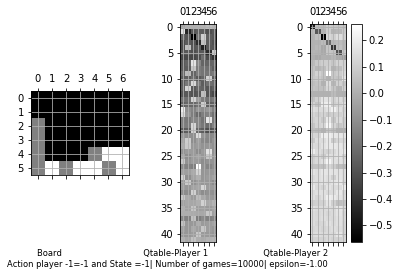

In [31]:
# the code for display
# we create figure for animation
f, axarr = plt.subplots(1,3)
listimages=[] # Just for the animation


axarr[0].grid(b=True,which='both')
axarr[1].grid(b=True,which='both')
axarr[2].grid(b=True,which='both')



####################
# Q learning runnning
####################


#Let's initialize the Q Table
Q1=np.zeros((S.shape[0],A.shape[0]))
Q2=np.zeros((S.shape[0],A.shape[0]))

#Let's initialize the matrix
boardstate=CreateBoardStates(nbrows,nbcolumns)
M=np.zeros((nbrows,nbcolumns))
print(M.shape)

print("S=",S)
print("S.shape=",S.shape)
print("A=",A)
print("A.shape=",A.shape)
print("Q1.shape=",Q1.shape)
print("Q2.shape=",Q2.shape)
print("M=",M)
print("M.shape=",M.shape)


#Let's define some hyper parameters
alpha=0.01 #learing rate
gamma=0.9 #Discount factor
epsilon1=0.3 #probability of exploration we want to get at the end
epsilon2=1 #probability of exploration we want to get at the end
nbgames=10000 # The number of trials, number of games


statsnbplayeronewins=0
for t in range(nbgames):
    # run one game
    #Let's initialize the board to 0
    M=np.zeros((nbrows,nbcolumns))
    playeronewins=OneGameLearning(A,Q1,Q2,M,epsilon1,epsilon2,alpha,gamma,listimages,t,False)
    if playeronewins==1:
        statsnbplayeronewins+=1
    
    #print("t=",t, "epsilon1=",epsilon1," player ",playeronewins," wins")
statsnbplayeronewins/=float(nbgames)
statsnbplayeronewins*=100
print("Fin du QLearning !!!")
print("Percentage of winning games for player one : "+str(statsnbplayeronewins))


ttl = plt.text(3, 43, 
                       "Board                               Qtable-Player 1                     Qtable-Player 2"+
                       "\nAction player "+str(-1)+"="+str(-1)+" and State ="+str(-1)+
                       "| Number of games="+str(nbgames)+"| epsilon="+"{:.2f}".format(-1)                       
                       ,horizontalalignment='right', verticalalignment='top', fontsize="small")
        #vmin=0, vmax=1,
im1 = axarr[0].matshow(M, animated=True,cmap='gray')
im2 = axarr[1].matshow(Q1, animated=True,cmap='gray')
im3 = axarr[2].matshow(Q2, animated=True,cmap='gray')
listimages.append([im1,im2,im3,ttl])
f.colorbar(im3,ax=axarr[2])



# Comment on the winning rate of player 1 
## It is closed to 60 percent that is related to percentage of randomness (30 percent). But it is less than 70 percent so it shows that the game is difficult to learn.


# Now let's us play one game without learning. 
# Player 1 does exploitation all the time. Player 2 is a random player.

S= [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
S.shape= (42,)
A= [0 1 2 3 4 5 6]
A.shape= (7,)
Q1.shape= (42, 7)
Q2.shape= (42, 7)
M= [[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 1. 2. 2.]
 [1. 2. 1. 2. 2. 1. 2.]]
M.shape= (6, 7)
Percentage of winning games for player one : 100.0


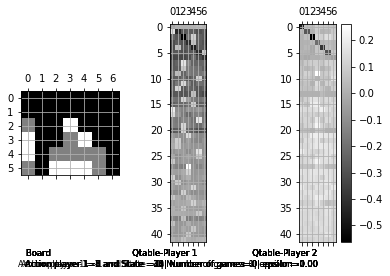

In [32]:
# the code for display
# we create figure for animation
f, axarr = plt.subplots(1,3)
listimages=[] # Just for the animation


axarr[0].grid(b=True,which='both')
axarr[1].grid(b=True,which='both')
axarr[2].grid(b=True,which='both')



####################
# Q learning runnning
####################

print("S=",S)
print("S.shape=",S.shape)
print("A=",A)
print("A.shape=",A.shape)
print("Q1.shape=",Q1.shape)
print("Q2.shape=",Q2.shape)
print("M=",M)
print("M.shape=",M.shape)


#Let's define some hyper parameters
alpha=0.01 #learing rate
gamma=0.9 #Discount factor
epsilon1=0 #probability of exploration we want to get at the end
epsilon2=1 #probability of exploration we want to get at the end
nbgames=1 # The number of trials, number of games


statsnbplayeronewins=0
for t in range(nbgames):
    # run one game
    #Let's initialize the board to 0
    M=np.zeros((nbrows,nbcolumns))
    playeronewins=OneGameLearning(A,Q1.copy(),Q2.copy(),M,epsilon1,epsilon2,alpha,gamma,listimages,t,True)
    if playeronewins==1:
        statsnbplayeronewins+=1
    
    #print("t=",t, "epsilon1=",epsilon1," player ",playeronewins," wins")
statsnbplayeronewins/=float(nbgames)
statsnbplayeronewins*=100
print("Percentage of winning games for player one : "+str(statsnbplayeronewins))


ttl = plt.text(3, 43, 
                       "Board                               Qtable-Player 1                     Qtable-Player 2"+
                       "\nAction player "+str(-1)+"="+str(-1)+" and State ="+str(-1)+
                       "| Number of games="+str(nbgames)+"| epsilon="+"{:.2f}".format(-1)                       
                       ,horizontalalignment='right', verticalalignment='top', fontsize="small")
        #vmin=0, vmax=1,
im1 = axarr[0].matshow(M, animated=True,cmap='gray')
im2 = axarr[1].matshow(Q1.copy(), animated=True,cmap='gray')
im3 = axarr[2].matshow(Q2.copy(), animated=True,cmap='gray')
listimages.append([im1,im2,im3,ttl])
f.colorbar(im3,ax=axarr[2])



# Let us create a video

In [33]:
from matplotlib import animation, rc
from IPython.display import HTML

ani = animation.ArtistAnimation(f, listimages, interval=8000, blit=True,
                                repeat_delay=100)


ani.save('QlearningConnect4Play.mp4')

plt.show()


In [34]:
HTML(ani.to_html5_video())


# Now let us see how strong is player 1 on 10000 games against a random player

In [28]:
# the code for display
# we create figure for animation
listimages=[] # Just for the animation



####################
# Q learning runnning
####################

print("S=",S)
print("S.shape=",S.shape)
print("A=",A)
print("A.shape=",A.shape)
print("Q1.shape=",Q1.shape)
print("Q2.shape=",Q2.shape)
print("M=",M)
print("M.shape=",M.shape)


#Let's define some hyper parameters
alpha=0.01 #learing rate
gamma=0.9 #Discount factor
epsilon1=0 #probability of exploration we want to get at the end
epsilon2=1 #probability of exploration we want to get at the end
nbgames=10000 # The number of trials, number of games


statsnbplayeronewins=0
for t in range(nbgames):
    # run one game
    #Let's initialize the board to 0
    M=np.zeros((nbrows,nbcolumns))
    playeronewins=OneGameLearning(A,Q1.copy(),Q2.copy(),M,epsilon1,epsilon2,alpha,gamma,listimages,t,False)
    if playeronewins==1:
        statsnbplayeronewins+=1
    
    #print("t=",t, "epsilon1=",epsilon1," player ",playeronewins," wins")
statsnbplayeronewins/=float(nbgames)
statsnbplayeronewins*=100
print("Percentage of winning games for player two : "+str(statsnbplayeronewins))



S= [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
S.shape= (42,)
A= [0 1 2 3 4 5 6]
A.shape= (7,)
Q1.shape= (42, 7)
Q2.shape= (42, 7)
M= [[0. 0. 0. 0. 0. 0. 0.]
 [2. 0. 0. 2. 2. 0. 1.]
 [1. 0. 0. 1. 2. 0. 1.]
 [2. 1. 2. 1. 2. 0. 2.]
 [1. 1. 2. 1. 2. 2. 1.]
 [1. 1. 1. 2. 1. 2. 2.]]
M.shape= (6, 7)
Percentage of winning games for player two : 66.83


# Conclusion 
## Player 1 could have won all the games because Connect Four is a solved game. But the learning process was not good enough to discover the winning strategy. 
## Why ? The modeling
The agent is only defined by a location in the board (x,y coordonates of the last token). This definition is quite blind. It means that the agent state does not reflect the entire state of the game. In this modelling, the agent state is very a narrow and a very local view of the game (the last move). This is a limitation of this approach.
## A solution : Deep Q learning
Get rid off the Qtable and replace it by Deep Neural Network

# Next : 
## Let's try to improve Qlearning thanks to Deep Learning (or at least Shallow Machine Learning techniques).
